In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [5]:
price = pd.read_csv("ToyotaCorolla.csv")

In [6]:
type(price)

pandas.core.frame.DataFrame

In [7]:
price1 = price[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [8]:
type(price1)

pandas.core.frame.DataFrame

In [9]:
price1.head(10)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [11]:
#checking correlation

In [14]:
price.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

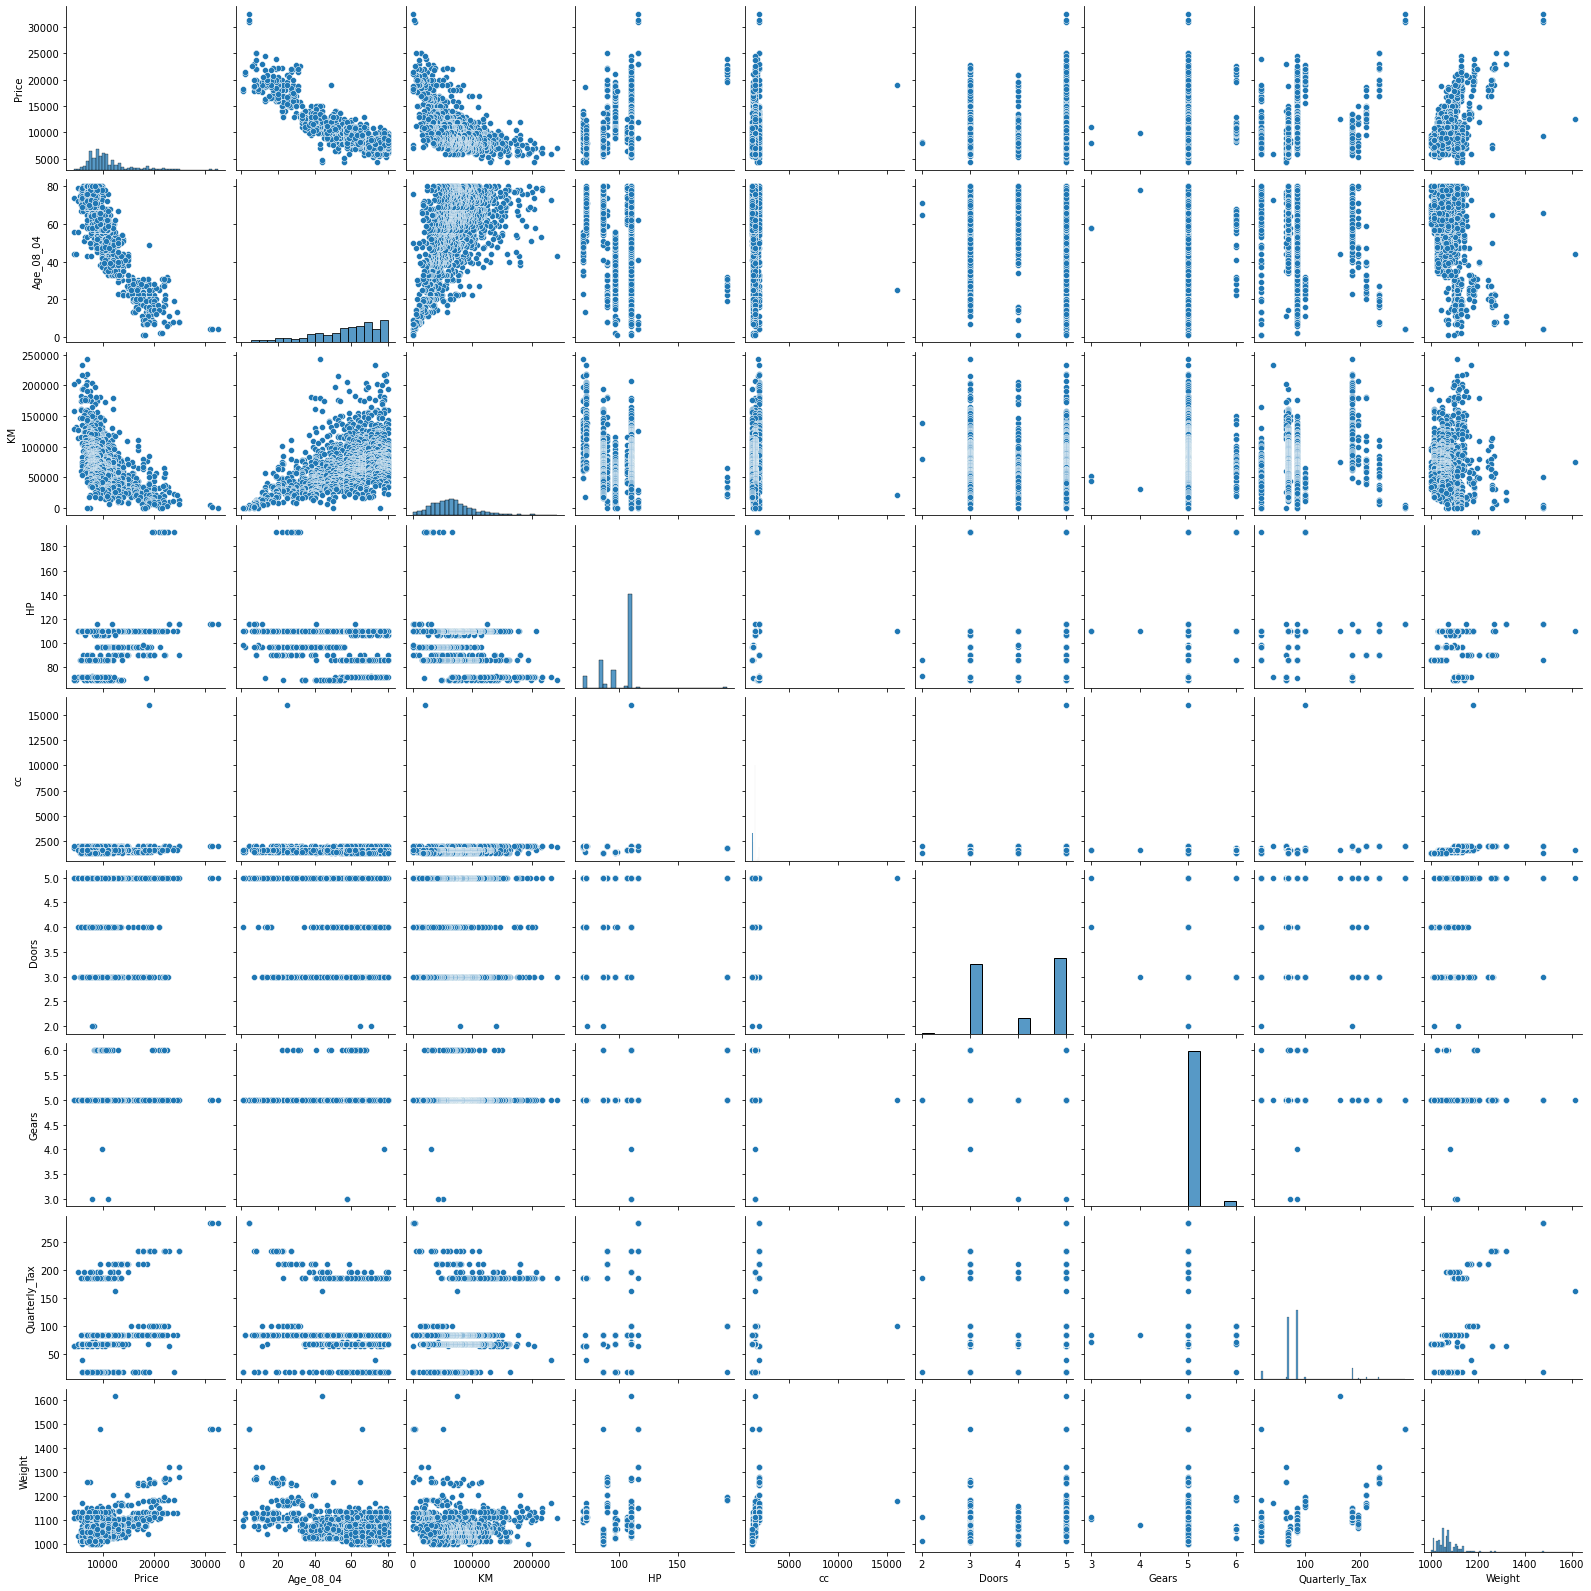

In [15]:
#Let's check scatterplot and Histogram for the Dataframe
import seaborn as sns
sns.pairplot(price1)
price1.columns

In [17]:
#Let's create the model now
import statsmodels.formula.api as smf

In [19]:
price_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = price1).fit()
price_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:31:08   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# From the summary we can say that the Doors values are not significant and affects the model we created
#Lets check the influencing values of the dataframe
import statsmodels.api as sm

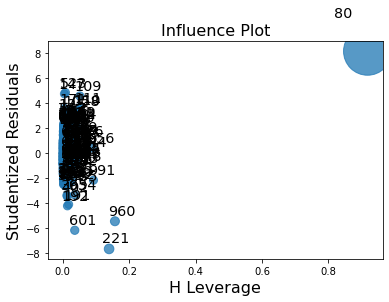

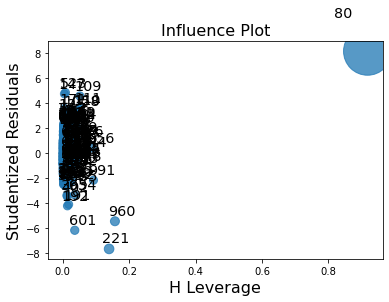

In [21]:
sm.graphics.influence_plot(price_model)

In [22]:
# It shows that the 80th record is influencing our model so lets try to remove this and see the result

In [23]:
price_model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = price1.drop(price1.index[80],axis=0)).fit()

In [24]:
price_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:33:19   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Significance level of the model has incresed but still its not up to our level so we will see if there is any other influencing factors still present

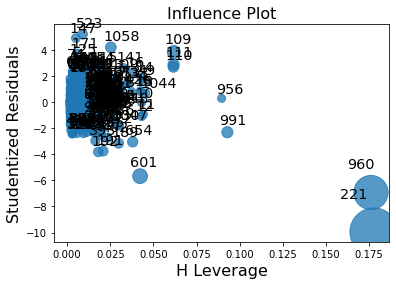

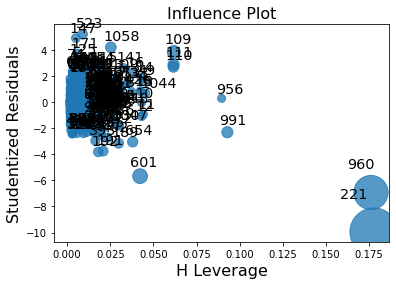

In [26]:
sm.graphics.influence_plot(price_model1)

In [ ]:
# We found that the 221 record is now the influencing record of our current data
# Lets remove it and try again

In [28]:
price_model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = price1.drop(price1.index[[80,221]],axis=0)).fit()
price_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:34:11   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age_08_04      -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM               -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP               39.2932      2.816     13.953      0.000      33.769      44.817
cc               -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors           -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears           485.0462    186.602      2.599      0.009     119.001     851.091
Quarterly_Tax     7.9664      1.382      5.762      0.000       5.254      10.678
Weight           25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Now all the values are significant and we also have high R-Squared value too 
# Hence we will select this model for the final work

In [30]:
#Let's create the new dataframe without the influencing records for further actions

In [33]:
price2 = price1.drop(price1.index[[80,221]],axis=0)

In [35]:
price_FinalModel = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = price2).fit()
price_FinalModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:35:06   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age_08_04      -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM               -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP               39.2932      2.816     13.953      0.000      33.769      44.817
cc               -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors           -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears           485.0462    186.602      2.599      0.009     119.001     851.091
Quarterly_Tax     7.9664      1.382      5.762      0.000       5.254      10.678
Weight           25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#Lets predict the values from our model

In [37]:
price.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [38]:
price_pred = price_FinalModel.predict(price2[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']])

In [39]:
price_pred

0       16464.269143
1       16015.934400
2       16438.822844
3       16097.016263
4       15920.074311
            ...     
1431     9015.088083
1432     8441.533328
1433     8592.387585
1434     8710.693475
1435    10235.621866
Length: 1434, dtype: float64

In [40]:
price_pred = price_FinalModel.predict(price2)

In [41]:
price_pred

0       16464.269143
1       16015.934400
2       16438.822844
3       16097.016263
4       15920.074311
            ...     
1431     9015.088083
1432     8441.533328
1433     8592.387585
1434     8710.693475
1435    10235.621866
Length: 1434, dtype: float64

In [42]:
# Confidence value
print(price_FinalModel.conf_int(0.01))

                          0            1
Intercept     -13852.415595 -6652.431818
Age_08_04       -123.048218  -110.108322
KM                -0.020467    -0.014086
HP                32.029772    46.556551
cc                -3.992282    -2.419026
Doors           -163.776357    33.032754
Gears              3.745814   966.346577
Quarterly_Tax      4.400585    11.532201
Weight            21.991581    28.107299


In [43]:
#Let's calculate Vif valuess of all the input variables

In [45]:
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = price2).fit().rsquared
vif_Age_08_04 = 1/(1-rsq_Age_08_04)

In [46]:
rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = price2).fit().rsquared
vif_KM = 1/(1-rsq_KM)

In [47]:
rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data = price2).fit().rsquared
vif_HP = 1/(1-rsq_HP)

In [48]:
rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data = price2).fit().rsquared
vif_cc = 1/(1-rsq_cc)

In [49]:
rsq_Doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = price2).fit().rsquared
vif_Door = 1/(1-rsq_Doors)

In [50]:
rsq_Gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data = price2).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

In [51]:
rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data = price2).fit().rsquared
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)

In [52]:
rsq_Weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data = price2).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

In [53]:
#Storing VIF values
price2_vif = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':['NA',vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Door,vif_Gears,vif_Quarterly_Tax,vif_Weight]}

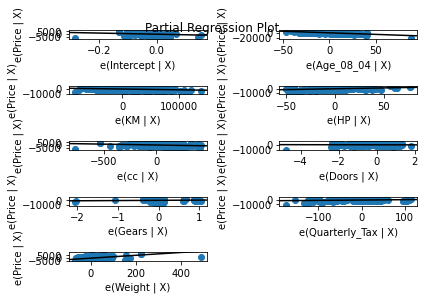

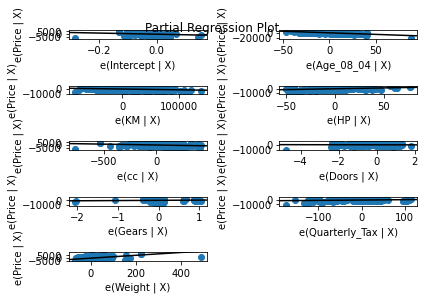

In [54]:
#Added variable plot
sm.graphics.plot_partregress_grid(price_FinalModel)

Text(0, 0.5, 'Fitted_values')

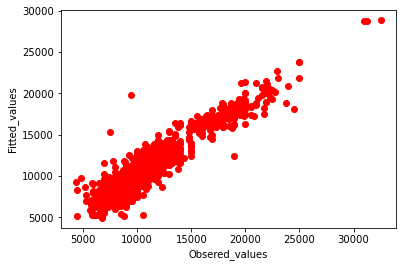

In [55]:
#Linearity
plt.scatter(price2.Price,price_pred,c="r");plt.xlabel("Obsered_values");plt.ylabel("Fitted_values")

In [56]:
#Normality plot for residuals
#Histogram

(array([  1.,   1.,   0.,   5.,  62., 515., 687., 150.,   9.,   4.]),
 array([-8.23115527, -6.89471056, -5.55826584, -4.22182112, -2.88537641,
        -1.54893169, -0.21248697,  1.12395775,  2.46040246,  3.79684718,
         5.1332919 ]),
 <BarContainer object of 10 artists>)

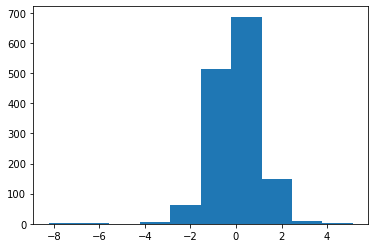

In [57]:
plt.hist(price_FinalModel.resid_pearson)

In [58]:
import pylab
import scipy.stats as st

In [59]:
#Checking residuals are normally distributed

((array([-3.30010144, -3.0425298 , -2.89926962, ...,  2.89926962,
          3.0425298 ,  3.30010144]),
  array([-8.23115527, -6.17855828, -3.90197882, ...,  4.14287474,
          4.99221869,  5.1332919 ])),
 (0.9780148811815536, 2.2848010284269635e-13, 0.9791123936108072))

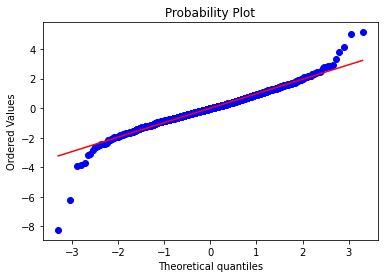

In [60]:
st.probplot(price_FinalModel.resid_pearson,dist = "norm",plot = pylab)

In [61]:
#Homoscedasticity
#Residuals Vs Fitted values

Text(0, 0.5, 'residuals')

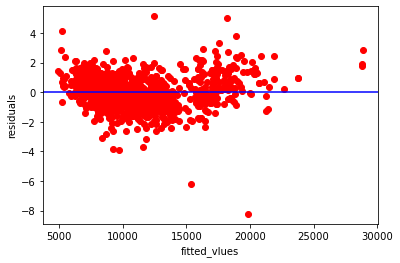

In [62]:
plt.scatter(price_pred,price_FinalModel.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_vlues");plt.ylabel("residuals")

In [63]:
#Lets check the data by splitting it into train and test data

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
price2_train,price2_test = train_test_split(price2,test_size = 0.2)

In [66]:
#preparing model on train data

In [67]:
model_train = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = price2_train).fit()

In [68]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     973.3
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:41:53   Log-Likelihood:                -9831.3
No. Observations:                1147   AIC:                         1.968e+04
Df Residuals:                    1138   BIC:                         1.973e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8983.1606   1549.861     -5.796      0.000    -1.2e+04   -5942.255
Age_08_04      -113.7164      2.818    -40.349      0.000    -119.246    -108.187
KM               -0.0181      0.001    -12.791      0.000      -0.021      -0.015
HP               39.2172      3.221     12.175      0.000      32.897      45.537
cc               -3.2522      0.346     -9.407      0.000      -3.931      -2.574
Doors           -50.3453     43.070     -1.169      0.243    -134.851      34.160
Gears           362.5205    214.423      1.691      0.091     -58.188     783.229
Quarterly_Tax     9.1950      1.559      5.897      0.000       6.135      12.255
Weight           24.2490      1.292     18.761      0.000      21.713      26.785
==============================================================================
Omnibus:                      163.645   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1601.667
Skew:                          -0.285   Prob(JB):                         0.00
Kurtosis:                       8.761   Cond. No.                     3.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#train data prediction

In [70]:
train_pred = model_train.predict(price2_train)  

In [71]:
#train residual values
train_resid = train_pred-price2_train.Price

In [72]:
#RMSE value for train data

In [73]:
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

1277.1827082713476

In [74]:
#predict on test database

In [75]:
test_pred = model_train.predict(price2_test)

In [76]:
#Test residual values

In [77]:
test_resid = test_pred-price2_test.Price

In [78]:
#RMSE value for test data

In [80]:
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse
train_rmse

1277.1827082713476

In [81]:
# The test RMSE and Train RMSE are very close to each other so we can say that our model performance is better and the final model will be

In [82]:
price_FinalModel = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = price2).fit()